In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
img = cv2.imread('Images./ss2.jpg')

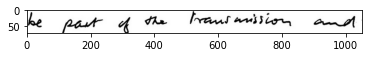

In [3]:
plt.imshow(img)

In [4]:
img_grayscale = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

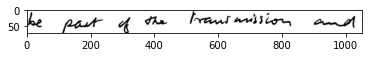

In [5]:
plt.imshow(img_grayscale/255.0,cmap='gray')

In [6]:
threshold, thresh_inv = cv2.threshold(img_grayscale,150,255,cv2.THRESH_BINARY_INV)
cv2.imshow('Simple Thresholded Inverse',thresh_inv)
cv2.waitKey(0)

-1

In [7]:
adaptive_thresh = cv2.adaptiveThreshold(img_grayscale, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,3)
cv2.imshow('AdaptiveThresholding', adaptive_thresh)
cv2.waitKey(0)

-1

In [8]:
vertical_hist =np.sum(adaptive_thresh,axis=0)/255

In [9]:
vertical_hist.shape

(1051,)

In [10]:
len(img)

71

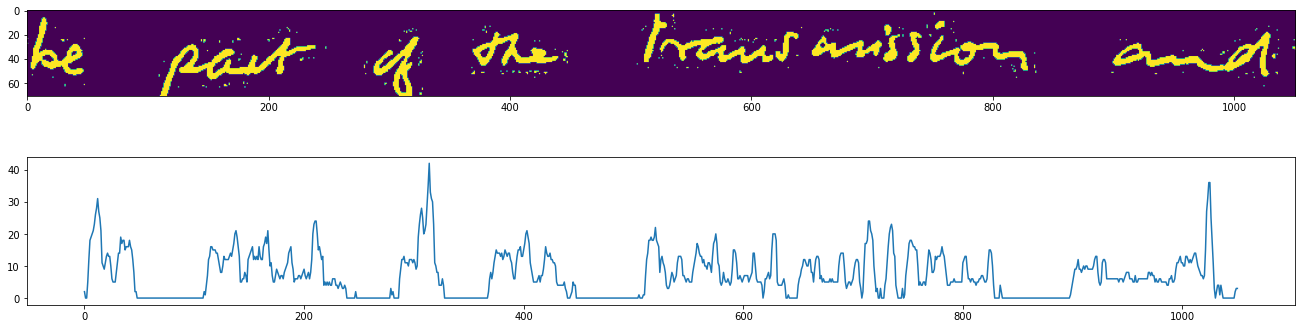

In [11]:
fig = plt.figure()

fig.set_figheight(6)
fig.set_figwidth(50)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
ax1.imshow(adaptive_thresh)
ax2.plot(vertical_hist)

In [12]:
np.min(vertical_hist)

0.0

In [13]:
def word_extractor(temp_line_array,line_hist):
    new_arr = []
    counter = 0
    for i in line_hist:
        if i >= 2:
            new_arr.append(temp_line_array[:,counter])
        else:
            for i in range(counter):
                temp_line_array = np.delete(temp_line_array,0,1)
                line_hist = np.delete(line_hist,0,)
            break
        counter += 1
    
    new_arr = np.array(new_arr)
    new_arr = np.transpose(new_arr)
   
    return new_arr,temp_line_array,line_hist


    

In [14]:
def word_gap_remover(temp_line_array,word_gap_counter,line_hist):
    for i in range(word_gap_counter):
        temp_line_array = np.delete(temp_line_array,0,1)
        line_hist = np.delete(line_hist,0,)
    return temp_line_array, line_hist

(71, 45)

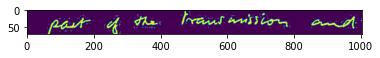

In [15]:
temp_line_array = adaptive_thresh
line_hist = vertical_hist
word_gap_counter = 0
for i in vertical_hist:
    if i <= 2:
        word_gap_counter += 1 
    else:
        break
temp_line_array, line_hist = word_gap_remover(temp_line_array,word_gap_counter,line_hist)

word_array,temp_line_array, line_hist = word_extractor(temp_line_array,line_hist)
plt.imshow(temp_line_array)
cv2.imshow('word_array', word_array)
cv2.waitKey(0)
# for i in line_hist:
#     print(i)
word_array.shape